(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Dataset

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_iris()
#datasets.load can get some clean and standarlized dataset. skip the data cleaning and feature engineering
#directly test your algorithm and model

In [9]:
type(data)

sklearn.utils.Bunch

In [10]:
type(data.data)

numpy.ndarray

In [11]:
data.data.shape # X 

(150, 4)

In [12]:
# Q: what does "no dimension" mean in Y ?(eg. data.shape: (150,))  
# A: It's a series, not dataframe

In [5]:
data.target.shape # Y

(150,)

In [7]:
print(data.DESCR)
print(data.feature_names)
print(data.target_names)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [13]:
# datasets.make_regression
# datasets.make_blobs

In [14]:
X, Y = datasets.make_blobs(n_samples=100, n_features=2, centers=3, random_state=1)

In [15]:
# test my algorithms (1, 2, 3)
# performance on ideal case: 1: 0.9   2: 0.6   3: 0.4

In [16]:
X.shape, Y.shape

((100, 2), (100,))

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

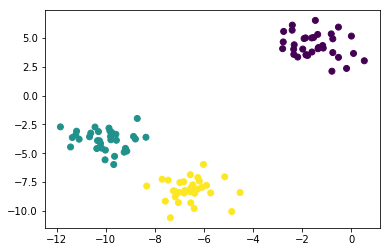

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [19]:
data = datasets.fetch_20newsgroups()

KeyboardInterrupt: 

In [ ]:
datasets.fetch_mldata?

In [ ]:
# load_, fetch_, make_

In [ ]:
# Excercise: create visualize the above given data, see how the cluster is spread out.

# Feature extraction

In [20]:
from sklearn import feature_extraction

In [ ]:
# feature_extraction.

In [ ]:
# DictVectorize, FeatureHasher (pro, con)

In [21]:
data = [
    {'today': 1, 'is': 0.5, 'good': 1, 'day': 1},
    {'tomorrow': 1, 'is': 1, 'good': 1, 'day': 1},
    {'yesterday': 1, 'is': 1, 'good': 1, 'day': 1}
]

In [22]:
fe_dv = feature_extraction.DictVectorizer() 
# initializa an instance

In [23]:
fe_dv.fit(data)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [24]:
fe_dv.vocabulary_
# inner results in fe_dv.fit 

{'day': 0, 'good': 1, 'is': 2, 'today': 3, 'tomorrow': 4, 'yesterday': 5}

In [34]:
fe_dv.transform(data)

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [30]:
fe_dv.fit_transform(data).toarray()

array([[ 1. ,  1. ,  0.5,  1. ,  0. ,  0. ],
       [ 1. ,  1. ,  1. ,  0. ,  1. ,  0. ],
       [ 1. ,  1. ,  1. ,  0. ,  0. ,  1. ]])

In [27]:
fe_dv.vocabulary_

{'day': 0, 'good': 1, 'is': 2, 'today': 3, 'tomorrow': 4, 'yesterday': 5}

In [ ]:
# CountVectorizer, TfidfVectorizer, HashingVectorizer
# different vectorizer means different algorithm

In [27]:
t1 = 'data scientist needs to to to learn statistics'
t2 = 'data scientist needs to learn computer science'
t3 = 'data scientist needs to learn business'
t4 = 'data scientist needs to know chemistry'
t5 = 'data scientist needs to know biology'

In [28]:
fe_cv = feature_extraction.text.CountVectorizer(ngram_range=(1, 2))
#ngram_range define the length of features (words in fe_cv.vocabulary)

In [29]:
fe_cv.fit([t1, t2, t3, t4])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
fe_cv.vocabulary_
#list of feature

{'business': 0,
 'chemistry': 1,
 'computer': 2,
 'computer science': 3,
 'data': 4,
 'data scientist': 5,
 'know': 6,
 'know chemistry': 7,
 'learn': 8,
 'learn business': 9,
 'learn computer': 10,
 'learn statistics': 11,
 'needs': 12,
 'needs to': 13,
 'science': 14,
 'scientist': 15,
 'scientist needs': 16,
 'statistics': 17,
 'to': 18,
 'to know': 19,
 'to learn': 20,
 'to to': 21}

In [32]:
fe_cv.transform([t1, t2, t3, t4, t5]).toarray()
# transform the data from text to array

array([[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 2],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]])

In [ ]:
# Exercise: try the TF-IDF, identify the difference & reason

# Feature selection

In [38]:
import numpy as np

* varience-based (mainly used)
* correlation-based (correlation between the feature and objective function/label)
* model-based (use one model,eg.linear regression, to find the different significance of features)
  * partially 
  * complete 
The last two method assume the linear relationship between feature and label, and this is why the last two are not preferred.

In [34]:
from sklearn import feature_selection

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


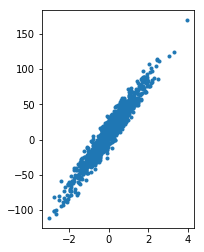

In [35]:
rgdata = datasets.make_regression(
    n_samples=1000, n_features=1, n_informative=1, 
    n_targets=1, bias=10.0, effective_rank=None, 
    tail_strength=0.5, noise=10.0, shuffle=True, 
    coef=True, random_state=1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(rgdata[0][:,0], rgdata[1], '.')
fig.show()

In [36]:
X, Y = rgdata[0], rgdata[1]
print(X.shape, Y.shape)

(1000, 1) (1000,)


In [40]:
X_nomeaning = np.ones(X.shape)
X_nomeaning[10] = 0

In [41]:
X1 = np.hstack([X, X_nomeaning])
# add a new column consisting of 1

In [42]:
X1.shape

(1000, 2)

In [43]:
from sklearn import feature_selection

In [49]:
fe_vt = feature_selection.VarianceThreshold(threshold=0.1)

In [50]:
fe_vt.fit(X1)

VarianceThreshold(threshold=0.1)

In [51]:
fe_vt.variances_

array([ 0.96236911,  0.000999  ])

In [52]:
fe_vt.transform(X1)

array([[ -1.06787658e+00],
       [ -2.91594596e-01],
       [  5.08077548e-02],
       [  6.21803504e-01],
       [ -5.45774168e-01],
       [  1.55501599e+00],
       [ -2.09752935e-01],
       [  1.78975468e+00],
       [ -7.67803746e-01],
       [  1.47073986e+00],
       [ -2.86384915e-01],
       [ -3.64538050e-01],
       [  4.03491642e-01],
       [  3.37220938e-01],
       [  8.64644065e-02],
       [ -1.67419581e+00],
       [ -9.24323185e-02],
       [  5.20576337e-01],
       [  1.46089238e+00],
       [ -9.15424368e-01],
       [ -1.61198320e-01],
       [  1.57546791e+00],
       [  7.44884536e-01],
       [  1.04499441e+00],
       [ -2.79099641e+00],
       [ -7.47158294e-01],
       [ -1.11711069e+00],
       [ -1.09033833e+00],
       [  8.59870972e-01],
       [  1.90915485e-01],
       [ -3.31283170e-01],
       [ -4.23478297e-01],
       [  3.19656942e-01],
       [ -1.94504696e+00],
       [ -8.80577600e-01],
       [  8.38634747e-01],
       [ -1.56450785e+00],
 

In [53]:
#How to determine the number of features you want (the threshold)?
#Draw the standard diviation as below

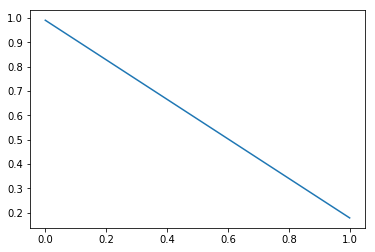

In [94]:
plt.plot(np.sqrt(X1.std(axis=0)))

In [ ]:
# GenericUnivariateSelect

In [ ]:
# RFE

In [ ]:
# Excercize: which two get selected? why?

np.random.seed(1)
X = np.random.random([1000, 1])
Y = X.ravel()
X1 = X + np.random.random([1000, 1]) * 0.01
X2 = np.random.random([1000, 3])
XF = np.hstack([X, X1, X2])

# Learning algorithm

In [ ]:
# Application levels

# Regression

# Classification

# Dimension reduction

# Clustering

# Outlier detection

In [ ]:
# focus on dummy regressor & linear regression first

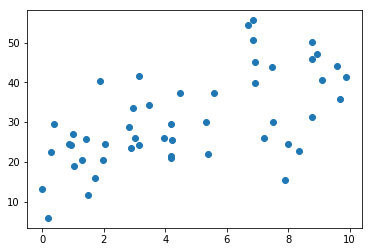

In [54]:
np.random.seed(1)
X = np.random.random([50,1]).ravel() * 10
Y = X * 2 + 20 + 10 * np.random.randn(50)
plt.scatter(X,Y)

In [55]:
from sklearn import linear_model

In [56]:
lm_lr = linear_model.LinearRegression()

In [58]:
lm_lr.fit(X.reshape(-1, 1), Y)
# X need to be 2-D, that's why X needs to be reshape

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
X.reshape(-1, 1).shape, Y.shape

((50, 1), (50,))

In [60]:
lm_lr.coef_, lm_lr.intercept_

(array([ 2.2720881]), 20.01422914446794)

In [61]:
Y_pred = lm_lr.predict(X.reshape(-1, 1))

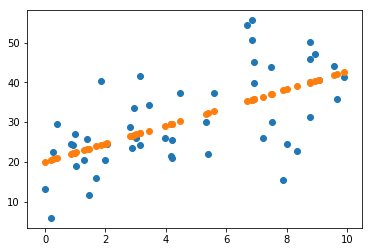

In [62]:
plt.scatter(X, Y)
plt.scatter(X, Y_pred)

use bootstrapping to create uncertainty
<p> use reshape to transform the 1-D vector to 2-D vector

In [ ]:
# Exercise: devise a way to get the uncertainty out of the regression

# Model evaluation

In [63]:
from sklearn import metrics

In [64]:
metrics.regression.mean_squared_error(Y, Y_pred)

81.833885702661746

In [65]:
# regression
# rmse

In [66]:
# classification
# auc 

In [67]:
# r2_score vs. explained_varience_ratio
metrics.regression.r2_score
metrics.explained_variance_score

<function sklearn.metrics.regression.explained_variance_score>

# Model selection


In [69]:
from sklearn import model_selection, tree

In [70]:
m1 = linear_model.Ridge?
# model hyperparameter selection
# different model selection
m2 = tree.DecisionTreeClassifier?

In [72]:
m2 = tree.DecisionTreeClassifier

In [73]:
data = datasets.load_iris()
X = data.data
Y = data.target

In [74]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, Y, random_state=1)

In [75]:
Xtrain.shape, Ytrain.shape

((112, 4), (112,))

In [76]:
lm_lr.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
lm_lr.predict(Xtest)

array([-0.32642856,  0.87679033,  1.15745495, -0.10411958,  1.8364727 ,
        1.42789018,  1.76037816,  0.17123984,  0.06123338,  1.96742963,
        1.27074352,  0.03349731,  1.89282839,  1.28737689,  1.37824544,
        0.02758093,  1.10704349,  1.47161853, -0.03844181, -0.14594373,
        1.3142206 ,  1.51799201,  1.48436946, -0.06176913,  1.76162223,
        1.21377869, -0.18680763, -0.01426902,  1.2795651 ,  1.66976968,
        1.34219709,  1.91830034,  1.07049464,  1.95067062,  2.06144585,
       -0.1091606 ,  1.22261727, -0.12225649])

In [79]:
model_selection.cross_val_predict(X, Y)
model_selection.cross_val_score

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
# or manually specify the fold
# directly fold or split
# stratified fold or split
# label fold or split

In [ ]:
# Iris data as example

In [ ]:
# GridSearch & RandomizedSearch

# Production pipeline

In [80]:
from sklearn import pipeline

In [81]:
pipeline.Pipeline?

In [137]:
fe_cv = feature_extraction.text.CountVectorizer() # XX
fe_vt = feature_selection.VarianceThreshold() # XX
lm_lr = linear_model.LinearRegression() # XX

p1 = pipeline.Pipeline(
    [('Feature extraction', fe_cv),  # .transform
     ('Feature selection', fe_vt), # .transfrom
     ('Regression', lm_lr)]) # .predict

p1.fit(Xtrain, Ytrain)
Ypred = p1.predict(Xtest)